<a href="https://colab.research.google.com/github/armenh1991/Space_Flights/blob/main/Space_Flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Statements**

In [ ]:
%pip install iso3166
%pip install --upgrade plotly
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df_data = pd.read_csv('mission_launches.csv')
df = pd.read_csv('new_space_missions.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.Price.dropna()



In [ ]:
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)


# **Launches Per Organisation**

In [ ]:
launches_per_company = df_data.Organisation.value_counts()
launches_per_company

<BarContainer object of 56 artists>

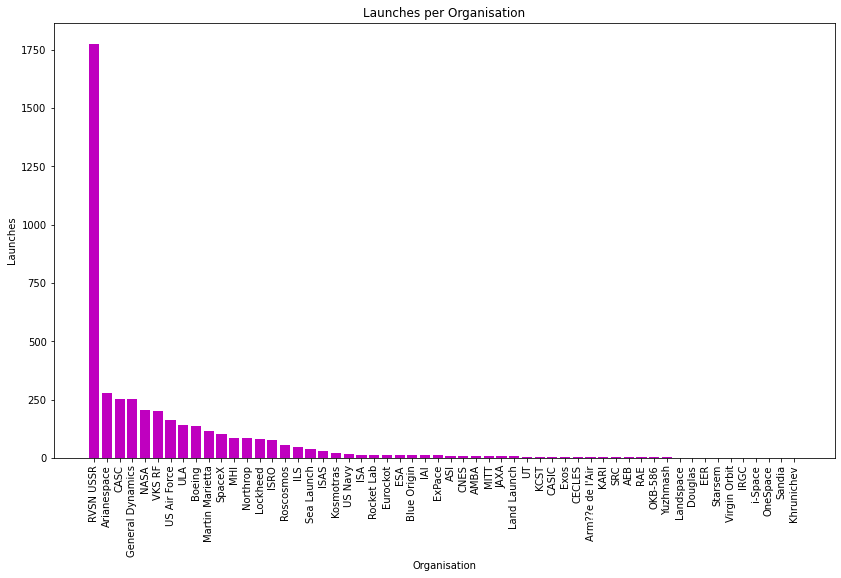

In [ ]:
plt.rcParams["figure.figsize"] = (14,8)
plt.title('Launches per Organisation')
plt.xlabel('Organisation')
plt.ylabel('Launches')
plt.xticks(rotation=90)
plt.bar(launches_per_company.index, launches_per_company, linewidth=3, color='m')

In [ ]:
active_rockets = df_data.Rocket_Status.value_counts()
active_rockets

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# **Price distribution**

In [ ]:
new_data = df_data.dropna()


new_data.Price

0        50.0
1       29.75
3        65.0
4       145.0
5       64.68
        ...  
3855     59.0
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 964, dtype: object

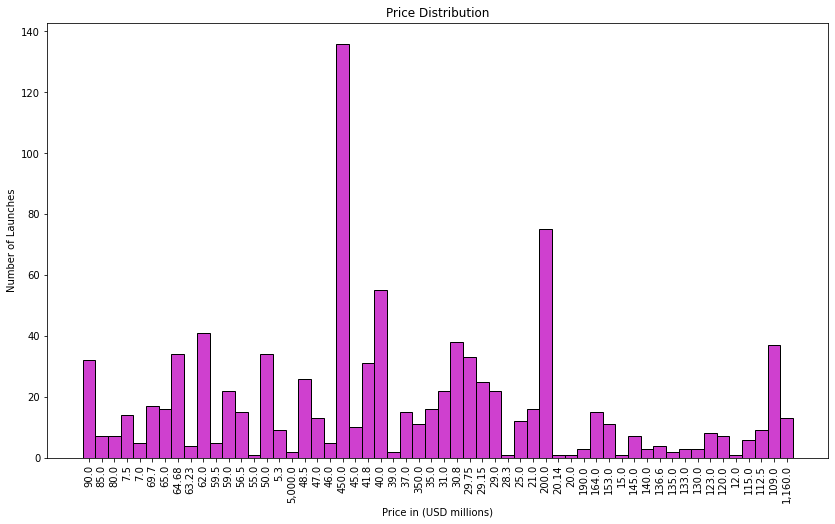

In [ ]:
plt.rcParams["figure.figsize"] = (14,8)
plt.title('Price Distribution')
plt.ylabel('Number of Launches')
plt.xlabel('Price in (USD millions)')
plt.xticks(rotation=90)
sns.histplot(new_data.Price.sort_values(ascending=False), color='m')

# **Split Country name from String**

In [ ]:
country_names = df_data['Location'].str.split(',').str[-1]
df_data['country_names'] = country_names
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country_names
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


# **Search for Organisation**

In [ ]:
df_data.Organisation.loc[df_data['Organisation'] == 'SpaceX']

  

0      SpaceX
2      SpaceX
8      SpaceX
17     SpaceX
20     SpaceX
        ...  
763    SpaceX
800    SpaceX
808    SpaceX
879    SpaceX
929    SpaceX
Name: Organisation, Length: 100, dtype: object

# **Launches Per Country**

In [ ]:
launches = df.groupby('country_names')[['Mission_Status']].count()
launches

,Mission_Status
country_names,
AUS,6
BRA,3
CHN,269
FRA,303
IND,76
IRN,1
ISR,11
Iran,13
JPN,126


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


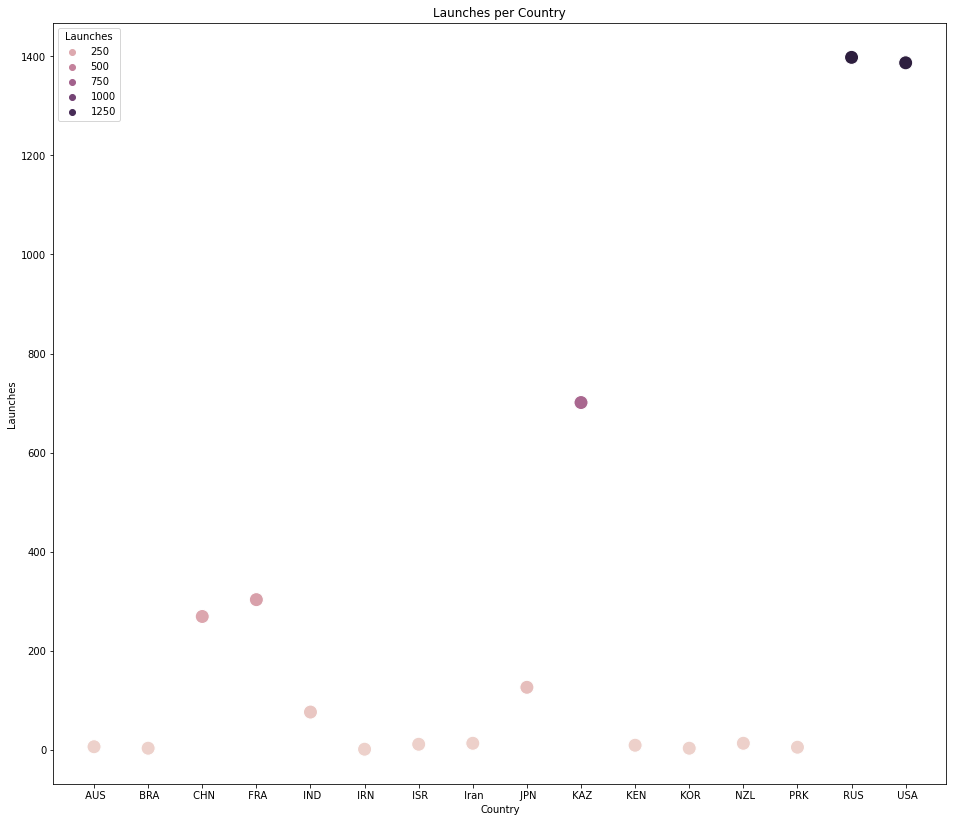

In [ ]:
plt.figure(figsize=(16,14))
plt.title('Launches per Country')
plt.xlabel('Country')
plt.ylabel('Launches')

sns.scatterplot(launches.index, 
                launches.Mission_Status,
                hue=launches.Mission_Status,
                s=200);
            
plt.legend(title='Launches')

# **Successful Launches Per Country**

In [ ]:
success_flight = df[df.Mission_Status == 'Success' ]

success_flight[['country_names', 'Mission_Status']]

successful_flights = success_flight.groupby('country_names')['Mission_Status'].count()
successful_flights


country_names
 AUS        3
 CHN      244
 FRA      285
 IND       63
 IRN        1
 ISR        9
 Iran       4
 JPN      113
 KAZ      608
 KEN        9
 KOR        1
 NZL       11
 PRK        2
 RUS     1305
 USA     1221
Name: Mission_Status, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


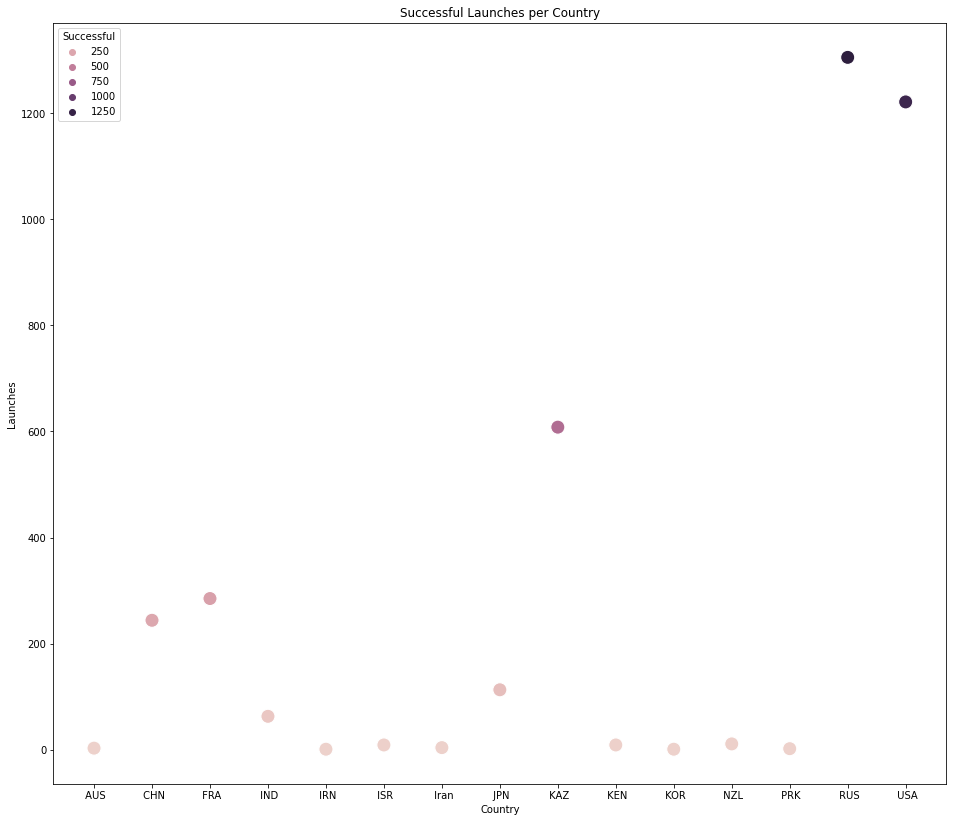

In [ ]:
plt.figure(figsize=(16,14))
plt.title('Successful Launches per Country')
plt.xlabel('Country')
plt.ylabel('Launches')

sns.scatterplot(successful_flights.index, 
                successful_flights,
                hue=successful_flights,
                s=200)
plt.legend(title='Successful')

# **Failed Launches Per Country**

In [ ]:
failed = df[df.Mission_Status == 'Failure']

failed[['country_names', 'Mission_Status']]

failed_launches = failed.groupby('country_names')['Mission_Status'].count()
failed

,Organisation,Date,Detail,Rocket_Status,Price,Mission_Status,country_names
11,ExPace,"Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,CHN
15,Rocket Lab,"Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,NZL
27,Virgin Orbit,"Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.00,Failure,USA
36,CASC,"Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN
43,CASC,"Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,CHN
...,...,...,...,...,...,...,...
4314,US Navy,"Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,USA
4315,RVSN USSR,"Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,KAZ
4318,AMBA,"Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure,USA
4319,US Navy,"Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


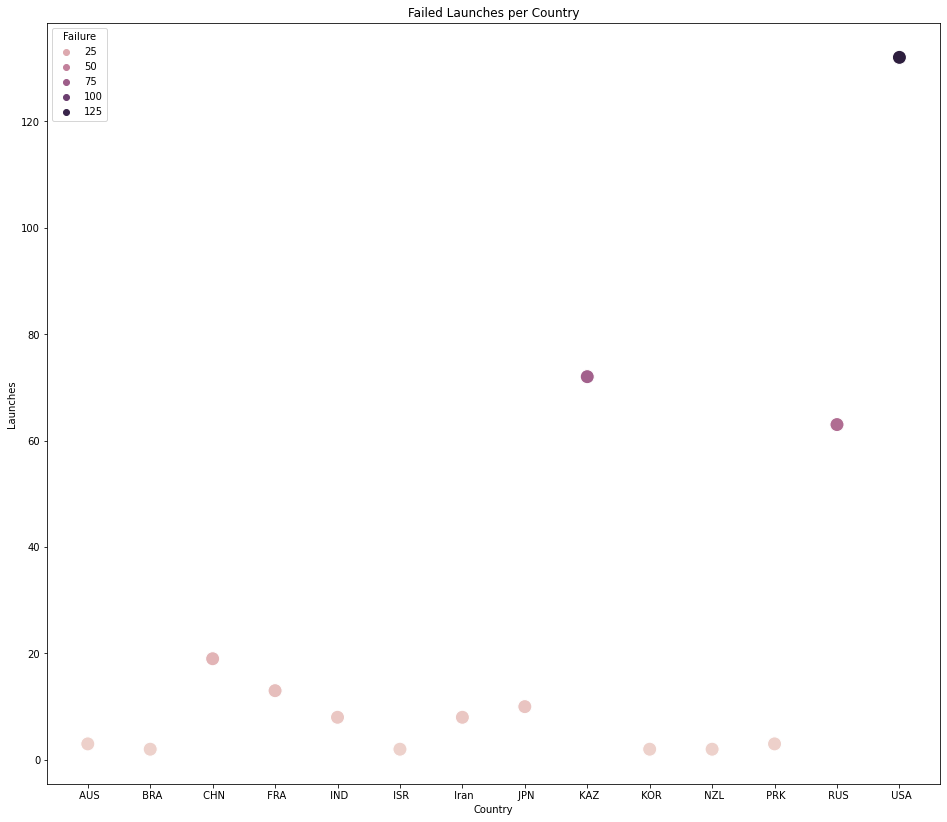

In [ ]:
plt.figure(figsize=(16,14))
plt.title('Failed Launches per Country')
plt.xlabel('Country')
plt.ylabel('Launches')

sns.scatterplot(failed_launches.index, 
                failed_launches,
                hue=failed_launches,
                s=200);

plt.legend(title='Failure')               

# **Amount of money spent by Organisation**

In [ ]:

total = df.groupby(['Organisation']).sum()

print(total['Price'])


Organisation
AEB                     0.00
AMBA                    0.00
ASI                     0.00
Arianespace        16,345.00
Arm??e de l'Air         0.00
Blue Origin             0.00
Boeing              1,241.00
CASC                6,340.26
CASIC                   0.00
CECLES                  0.00
CNES                    0.00
Douglas                 0.00
EER                    20.00
ESA                    37.00
Eurockot              543.40
ExPace                 28.30
Exos                    0.00
General Dynamics        0.00
IAI                     0.00
ILS                 1,320.00
IRGC                    0.00
ISA                     0.00
ISAS                    0.00
ISRO                2,177.00
JAXA                  168.00
KARI                    0.00
KCST                    0.00
Khrunichev              0.00
Kosmotras             638.00
Land Launch             0.00
Landspace               0.00
Lockheed              280.00
MHI                 3,532.50
MITT                    0.00
M

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'USD in millions')

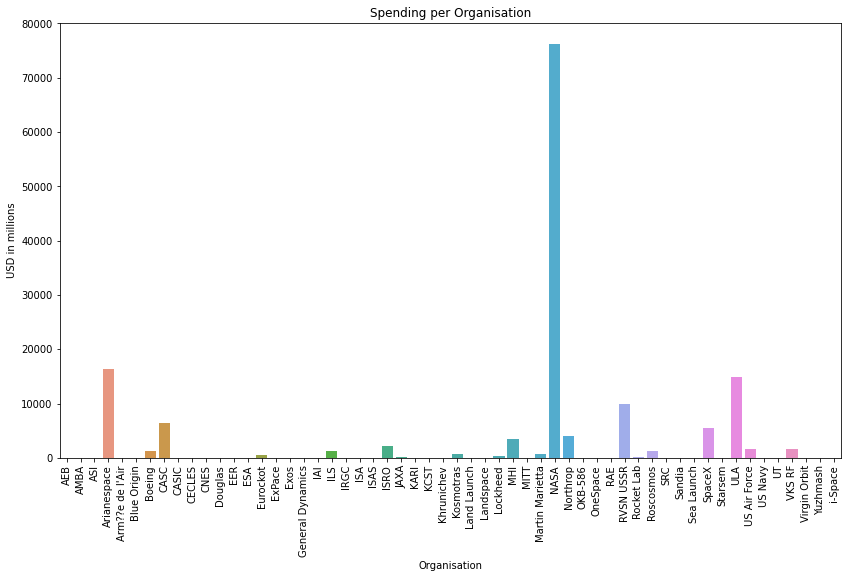

In [ ]:
plt.xticks(rotation=90)
plt.title('Spending per Organisation')
plt.xlabel('Organisation')




sns.barplot(total.index, total.Price )
plt.ylabel('USD in millions')

# **Launches per Year**

In [ ]:
df['Date'] = pd.to_datetime(df.Date, utc=True)

year = df.Date.dt.year
month = df.Date.dt.month

df['Year'] = year
df['Month'] = month

In [ ]:
launches_per_year = df.groupby('Year').count()

launches_per_year


,Organisation,Date,Detail,Rocket_Status,Price,Mission_Status,country_names,Month
Year,,,,,,,,
1957,3,3,3,3,0,3,3,3
1958,28,28,28,28,0,28,28,28
1959,20,20,20,20,0,20,20,20
1960,39,39,39,39,0,39,39,39
1961,52,52,52,52,0,52,52,52
...,...,...,...,...,...,...,...,...
2016,90,90,90,90,64,90,90,90
2017,92,92,92,92,66,92,92,92
2018,117,117,117,117,88,117,117,117


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


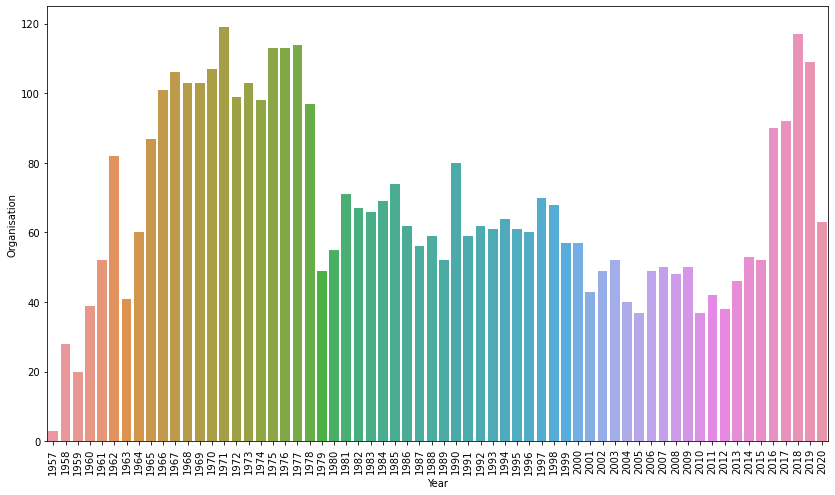

In [ ]:
plt.xticks(rotation=90)

sns.barplot(launches_per_year.index, launches_per_year.Organisation)

# **Launches per Month**

In [ ]:
launches_per_month = df.groupby('Month').count()

launches_per_month

,Organisation,Date,Detail,Rocket_Status,Price,Mission_Status,country_names,Year
Month,,,,,,,,
1,268,268,268,268,66,268,268,268
2,336,336,336,336,60,336,336,336
3,353,353,353,353,77,353,353,353
4,383,383,383,383,91,383,383,383
5,326,326,326,326,86,326,326,326
6,402,402,402,402,85,402,402,402
7,351,351,351,351,77,351,351,351
8,373,373,373,373,82,373,373,373
9,365,365,365,365,88,365,365,365


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Launches')

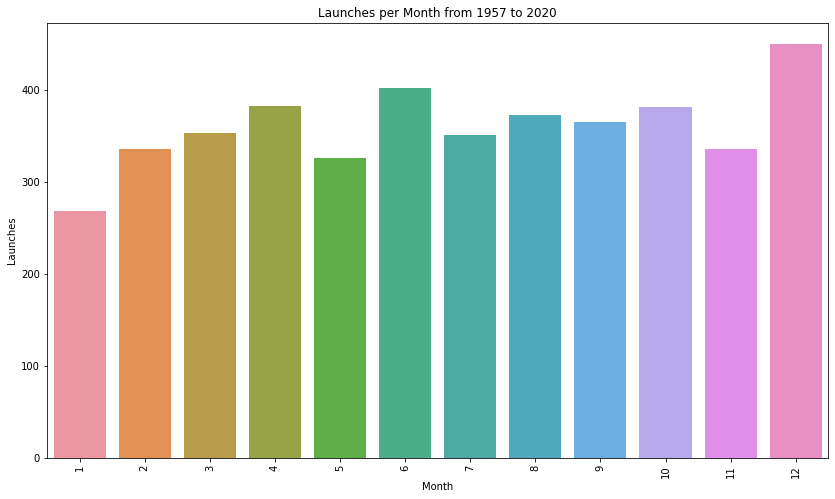

In [ ]:
plt.xticks(rotation=90)
plt.title('Launches per Month from 1957 to 2020')


sns.barplot(launches_per_month.index, launches_per_month.Organisation)
plt.ylabel('Launches')

# **Spending Over Time** 
with average spending

In [ ]:
dff = df.dropna()
price_overtime = dff.groupby('Year').sum()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Year')

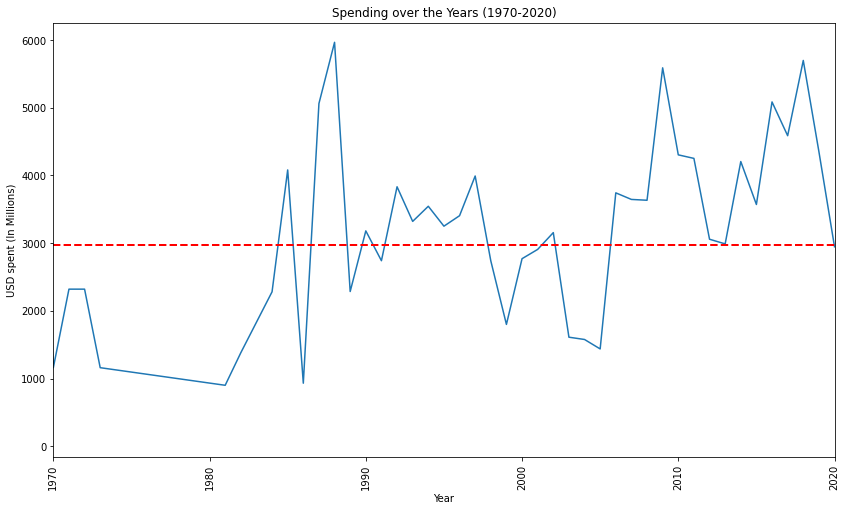

In [ ]:
plt.xticks(rotation=90)
plt.ylabel('USD spent (In Millions)')
plt.xlim([1970, 2020])
plt.title('Spending over the Years (1970-2020)')

sns.lineplot(price_overtime.index, price_overtime.Price)
plt.axhline(y=np.nanmean(price_overtime.Price), color='red', linestyle='--', linewidth=2)
plt.xlabel('Year')

# **Launches per Organisation Over Time**

In [ ]:
#top_ten = df.groupby('Organisation').count().sort_values(by=['Date'], ascending=False).head(10) ## top 10 Organisation Launches ##
over = df[['Organisation', 'Year']].sort_values(by=['Organisation'])

print(over)

      Organisation  Year
1032           AEB  2003
1354           AEB  1997
1221           AEB  1999
4297          AMBA  1958
4294          AMBA  1958
...            ...   ...
1541        VKS RF  1994
27    Virgin Orbit  2020
3514      Yuzhmash  1969
1719      Yuzhmash  1991
120        i-Space  2019

[4324 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


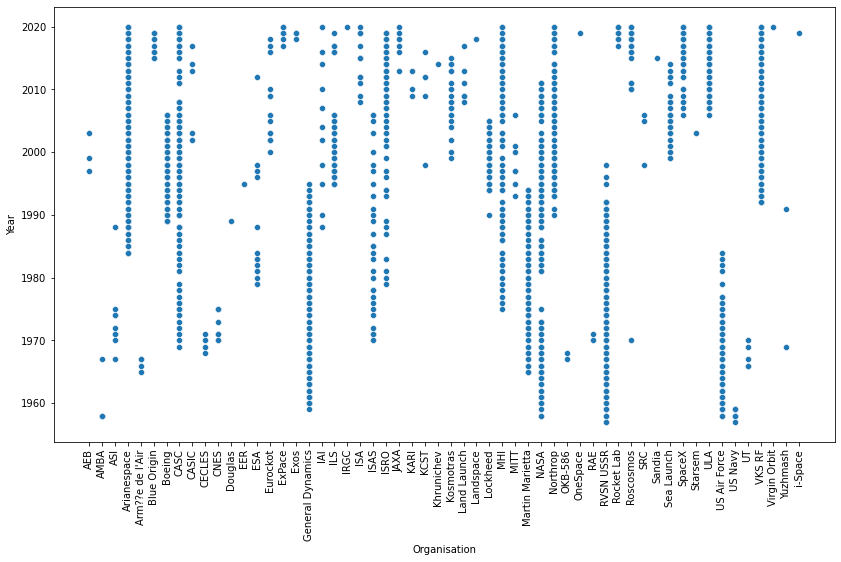

In [ ]:
plt.xticks(rotation=90)

sns.scatterplot(over.Organisation, over.Year)